<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Katty/blob/main/Actividad_Semanal_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombres : Katherine Vanegas Salamanca 

Matricula : A01794113 

Materia: Ciencia de Datos

Profesor: Maria de la Paz Rico / Roberto Antonio Guevara González

Actividad: Actividad Semanal -- 6

**Punto 1:** Descarga los datos y se carga el dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

dataf = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv')
dataf

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


**Punto 2:** Obtener la información del DataFrame con los métodos y propiedades

In [2]:
dataf.shape  #el dataframe tiene 30.000 filas y 25 columnas

(30000, 25)

In [3]:
dataf.columns #el encabezado de cada columna

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [4]:
dataf.head() #muestra las primeras 5 filas del df

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [5]:
dataf.dtypes #muestra el tipo de dato en cada columna

ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

In [6]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

In [7]:
dataf.isna().sum() #muestra el número de datos faltantes en el df

ID      0
X1      0
X2      1
X3      2
X4      2
X5      5
X6      3
X7      5
X8      7
X9      9
X10    16
X11    14
X12    11
X13    11
X14    13
X15    15
X16    17
X17    10
X18     8
X19     9
X20     8
X21    11
X22    11
X23     5
Y       3
dtype: int64

Punto 3: Limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [8]:

num_names = ['X1','X5','X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']

cat_names = [ 'X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']



In [9]:
dataf.dropna(inplace=True)

In [10]:
dataf.isna().sum()

ID     0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

**Punto 4:** Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [11]:
dataf.describe()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,15005.550504,167555.900928,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,...,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,8654.547473,129737.299088,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,...,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7516.250000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,15005.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22497.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


La dispersión en los datos de las variables categoricas es menor a la dispersion  de las variables numericas

**Punto 5:** Realiza el conteo de las variables categóricas

In [12]:
cat_names

['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']

In [13]:
dataf['X2'].value_counts()


2.0    18095
1.0    11863
Name: X2, dtype: int64

In [14]:
dataf['X3'].value_counts()

2.0    14009
1.0    10572
3.0     4909
5.0      280
4.0      123
6.0       51
0.0       14
Name: X3, dtype: int64

In [15]:
dataf['X4'].value_counts()

2.0    15939
1.0    13643
3.0      322
0.0       54
Name: X4, dtype: int64

In [16]:
dataf['X6'].value_counts()

 0.0    14717
-1.0     5680
 1.0     3678
-2.0     2758
 2.0     2662
 3.0      322
 4.0       76
 5.0       26
 8.0       19
 6.0       11
 7.0        9
Name: X6, dtype: int64

In [17]:
dataf['X7'].value_counts()

 0.0    15709
-1.0     6042
 2.0     3918
-2.0     3778
 3.0      326
 4.0       99
 1.0       28
 5.0       25
 7.0       20
 6.0       12
 8.0        1
Name: X7, dtype: int64

In [18]:
dataf['X8'].value_counts()

 0.0    15742
-1.0     5930
-2.0     4082
 2.0     3811
 3.0      240
 4.0       76
 7.0       27
 6.0       23
 5.0       21
 1.0        4
 8.0        2
Name: X8, dtype: int64

In [19]:
dataf['X9'].value_counts()

 0.0    16431
-1.0     5681
-2.0     4343
 2.0     3154
 3.0      179
 4.0       69
 7.0       57
 5.0       35
 6.0        5
 1.0        2
 8.0        2
Name: X9, dtype: int64

In [20]:
dataf['X10'].value_counts()

 0.0    16925
-1.0     5533
-2.0     4541
 2.0     2618
 3.0      178
 4.0       84
 7.0       57
 5.0       17
 6.0        4
 8.0        1
Name: X10, dtype: int64

In [21]:
dataf['X11'].value_counts()

 0.0    16266
-1.0     5731
-2.0     4890
 2.0     2760
 3.0      183
 4.0       49
 7.0       46
 6.0       18
 5.0       13
 8.0        2
Name: X11, dtype: int64

**Punto 6:** Escala los datos, si consideras necesario

In [22]:
#se eliminan variables categoricas y de salida
dataf1 = dataf.drop(['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'Y'], axis = 1)



In [23]:
scaler = StandardScaler()

dataf_scaled = pd.DataFrame(scaler.fit_transform(dataf1), columns=dataf1.columns)
dataf_scaled

,ID,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,-1.733748,-1.137363,-1.246282,-0.642497,-0.647359,-0.667925,-0.672419,-0.663031,-0.652714,-0.341890,-0.227134,-0.296782,-0.308107,-0.314124,-0.293485
1,-1.733632,-0.366561,-1.029224,-0.659205,-0.666697,-0.639201,-0.621583,-0.606229,-0.597982,-0.341890,-0.213645,-0.240019,-0.244315,-0.314124,-0.181054
2,-1.733517,-0.597802,-0.160996,-0.298738,-0.493940,-0.482436,-0.449762,-0.417277,-0.391745,-0.250270,-0.191958,-0.240019,-0.244315,-0.248702,-0.012407
3,-1.733401,-0.906122,0.164590,-0.057797,-0.013586,0.032552,-0.232512,-0.186929,-0.156808,-0.221179,-0.169448,-0.228667,-0.237936,-0.244188,-0.237269
4,-1.733285,-0.906122,2.335161,-0.578648,-0.611297,-0.161383,-0.347080,-0.348260,-0.331626,-0.221179,1.333962,0.270850,0.266021,-0.269048,-0.255314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29953,1.732118,0.404240,0.381647,1.869050,2.016773,2.325211,0.694875,-0.149477,-0.384512,0.171131,0.610450,-0.012796,-0.113733,0.012988,-0.237269
29954,1.732234,-0.135321,0.815761,-0.672765,-0.665250,-0.627383,-0.532915,-0.577704,-0.652714,-0.231017,-0.104084,0.213973,-0.299878,-0.314124,-0.293485
29955,1.732349,-1.060283,0.164590,-0.647220,-0.643793,-0.638106,-0.348043,-0.324651,-0.327833,-0.341890,-0.257018,0.952008,-0.040181,-0.183279,-0.119217
29956,1.732465,-0.674882,0.598704,-0.717937,0.409753,0.421878,0.147516,-0.468128,0.168744,4.842633,-0.109159,-0.229915,-0.185244,3.150905,-0.192072


**Punto 7: **Reduce las dimensiones con PCA, si consideras necesario.
Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%
Indica la importancia de las variables en cada componente

In [24]:
#matriz de correlacion
corr = dataf_scaled.corr()
corr

,ID,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
ID,1.000000,0.026230,0.019104,0.019360,0.017956,0.024372,0.040379,0.016807,0.016773,0.009673,0.008374,0.039068,0.007752,0.000616,0.002889
X1,0.026230,1.000000,0.144515,0.285616,0.278435,0.283373,0.294090,0.295625,0.290517,0.195026,0.178320,0.210052,0.203187,0.216990,0.219567
X5,0.019104,0.144515,1.000000,0.056357,0.054469,0.053911,0.051528,0.049515,0.047810,0.025995,0.021820,0.029262,0.021338,0.022811,0.019533
X12,0.019360,0.285616,0.056357,1.000000,0.951494,0.892272,0.860273,0.829781,0.802638,0.140276,0.099301,0.156856,0.158260,0.167010,0.179287
X13,0.017956,0.278435,0.054469,0.951494,1.000000,0.928306,0.892456,0.859756,0.831570,0.280323,0.100770,0.150631,0.147338,0.157848,0.174180
X14,0.024372,0.283373,0.053911,0.892272,0.928306,1.000000,0.923953,0.883893,0.853302,0.244291,0.316904,0.129933,0.143343,0.179617,0.182257
X15,0.040379,0.294090,0.051528,0.860273,0.892456,0.923953,1.000000,0.940133,0.900931,0.232916,0.207498,0.299953,0.130124,0.160283,0.177562
X16,0.016807,0.295625,0.049515,0.829781,0.859756,0.883893,0.940133,1.000000,0.946187,0.216967,0.181177,0.252229,0.293084,0.141421,0.164102
X17,0.016773,0.290517,0.047810,0.802638,0.831570,0.853302,0.900931,0.946187,1.000000,0.199966,0.172615,0.233710,0.250218,0.307691,0.115415
X18,0.009673,0.195026,0.025995,0.140276,0.280323,0.244291,0.232916,0.216967,0.199966,1.000000,0.285522,0.252063,0.199491,0.148102,0.185659


In [25]:
# Se utiliza el método de Principal Components Analysis para la reducción de la dimensionalidad de los datos.

pcs = PCA()
pcs = pcs.fit(dataf_scaled)
pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                          }
                          )
pcsSummary = pcsSummary.transpose()
pcsSummary.round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Standard deviation,2.43,1.31,1.02,1.00,0.96,0.94,0.93,0.88,0.85,0.84,0.51,0.27,0.2,0.16,0.15
Proportion of variance,0.39,0.11,0.07,0.07,0.06,0.06,0.06,0.05,0.05,0.05,0.02,0.00,0.0,0.00,0.00
Cumulative proportion,0.39,0.51,0.58,0.65,0.71,0.77,0.82,0.88,0.92,0.97,0.99,0.99,1.0,1.00,1.00


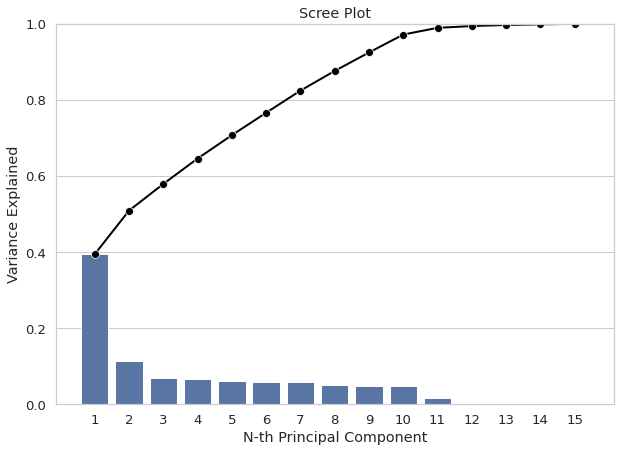

In [26]:
# Se grafica el Screen Plot para observar el comportamiento de los componentes.

PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
_.set(xlabel='N-th Principal Component', ylabel = 'Variance Explained')
plt.ylim(0, 1)
plt.show()

In [27]:
pcsSummary.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary.columns) + 1)]
pcsSummary.round(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
Standard deviation,2.43,1.31,1.02,1.00,0.96,0.94,0.93,0.88,0.85,0.84,0.51,0.27,0.2,0.16,0.15
Proportion of variance,0.39,0.11,0.07,0.07,0.06,0.06,0.06,0.05,0.05,0.05,0.02,0.00,0.0,0.00,0.00
Cumulative proportion,0.39,0.51,0.58,0.65,0.71,0.77,0.82,0.88,0.92,0.97,0.99,0.99,1.0,1.00,1.00


5 componentes explican una varianza acumulada del 71%

In [28]:
pcsCompsDf = pd.DataFrame(pcs.components_.transpose(), columns= pcsSummary.columns, index=dataf_scaled.columns)
pcsCompsDf.iloc[:, :7]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
ID,0.013378,0.024322,-0.323599,0.911088,-0.211499,0.058784,0.038186
X1,0.165535,0.300855,-0.353109,-0.148275,-0.192385,0.042873,-0.074721
X5,0.032833,0.072453,-0.831673,-0.228985,0.359219,-0.056915,0.061671
X12,0.372398,-0.190909,-0.029037,-0.026153,-0.060595,0.043833,-0.042259
X13,0.383199,-0.174815,0.001240,-0.010501,0.012693,0.082603,-0.027588
X14,0.388224,-0.127020,0.034836,0.006011,0.068106,0.108145,0.100049
X15,0.391555,-0.120229,0.021840,0.048865,0.065901,0.028860,0.016167
X16,0.388449,-0.106132,0.031603,0.017430,0.034423,-0.105557,-0.102634
X17,0.380617,-0.094392,0.022139,-0.011549,-0.072045,-0.165131,0.065910
X18,0.135114,0.382879,0.163350,0.081276,0.370549,0.211452,0.038531


Importancia de cada variable en cada componente principal

In [29]:
pcsCompsDf.PC1.abs().nlargest(3)

X15    0.391555
X16    0.388449
X14    0.388224
Name: PC1, dtype: float64

In [30]:
pcsCompsDf.PC2.abs().nlargest(3)

X19    0.408062
X20    0.392808
X18    0.382879
Name: PC2, dtype: float64

In [31]:
pcsCompsDf.PC3.abs().nlargest(3)

X5    0.831673
X1    0.353109
ID    0.323599
Name: PC3, dtype: float64

In [32]:
pcsCompsDf.PC4.abs().nlargest(3)

ID     0.911088
X5     0.228985
X20    0.179812
Name: PC4, dtype: float64

In [33]:
pcsCompsDf.PC5.abs().nlargest(3)

X22    0.585258
X18    0.370549
X5     0.359219
Name: PC5, dtype: float64

**Punto 8:** Elabora los histogramas de los atributos para visualizar su distribución

In [34]:
dataf_scaled['X19']

0       -0.227134
1       -0.213645
2       -0.191958
3       -0.169448
4        1.333962
           ...   
29953    0.610450
29954   -0.104084
29955   -0.257018
29956   -0.109159
29957   -0.178946
Name: X19, Length: 29958, dtype: float64

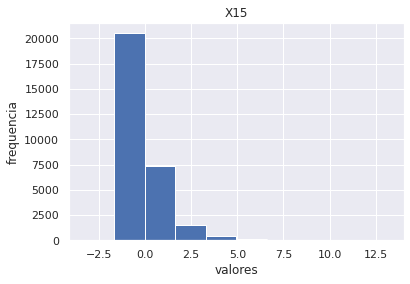

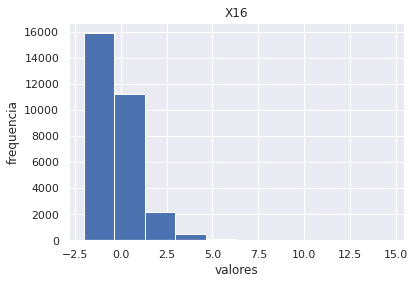

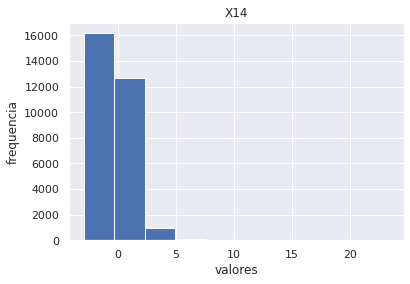

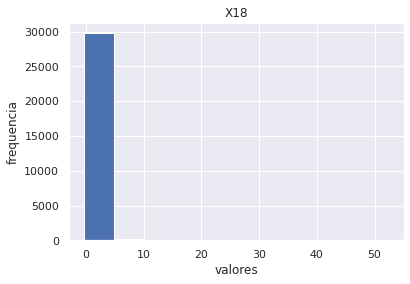

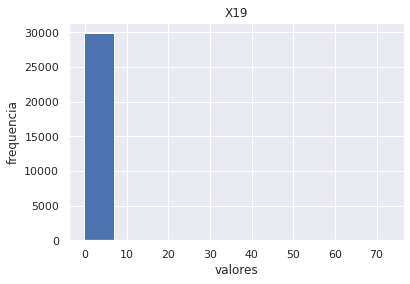

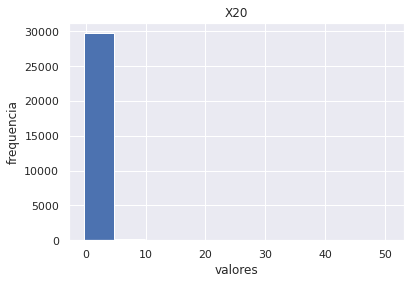

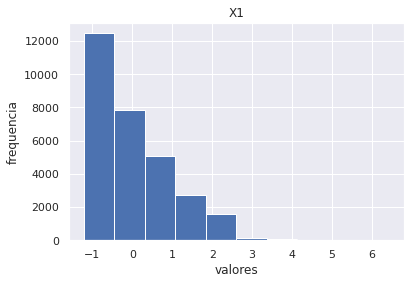

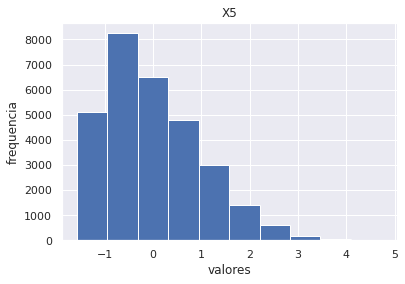

In [35]:
variables = ['X15', 'X16', 'X14', 'X18', 'X19','X20', 'X1', 'X5']
sns.set(rc={'figure.figsize':(6,4)})

for i in range(0,8):
 
    plt.hist(dataf_scaled[variables[i]], bins= 10)
    plt.ylabel('frequencia')
    plt.xlabel('valores')
    plt.title(variables[i])
    plt.show()

**Punto 9:** Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

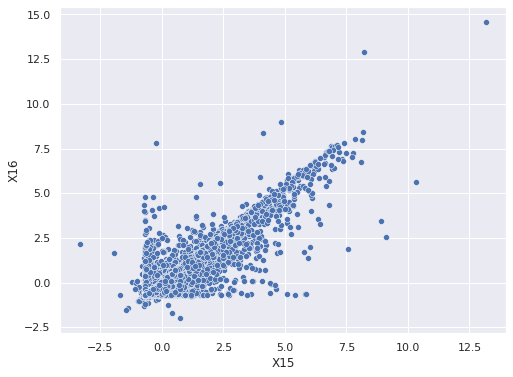

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=dataf_scaled, x='X15', y='X16')

In [37]:
dataf_scaled.columns

Index(['ID', 'X1', 'X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
       'X19', 'X20', 'X21', 'X22', 'X23'],
      dtype='object')

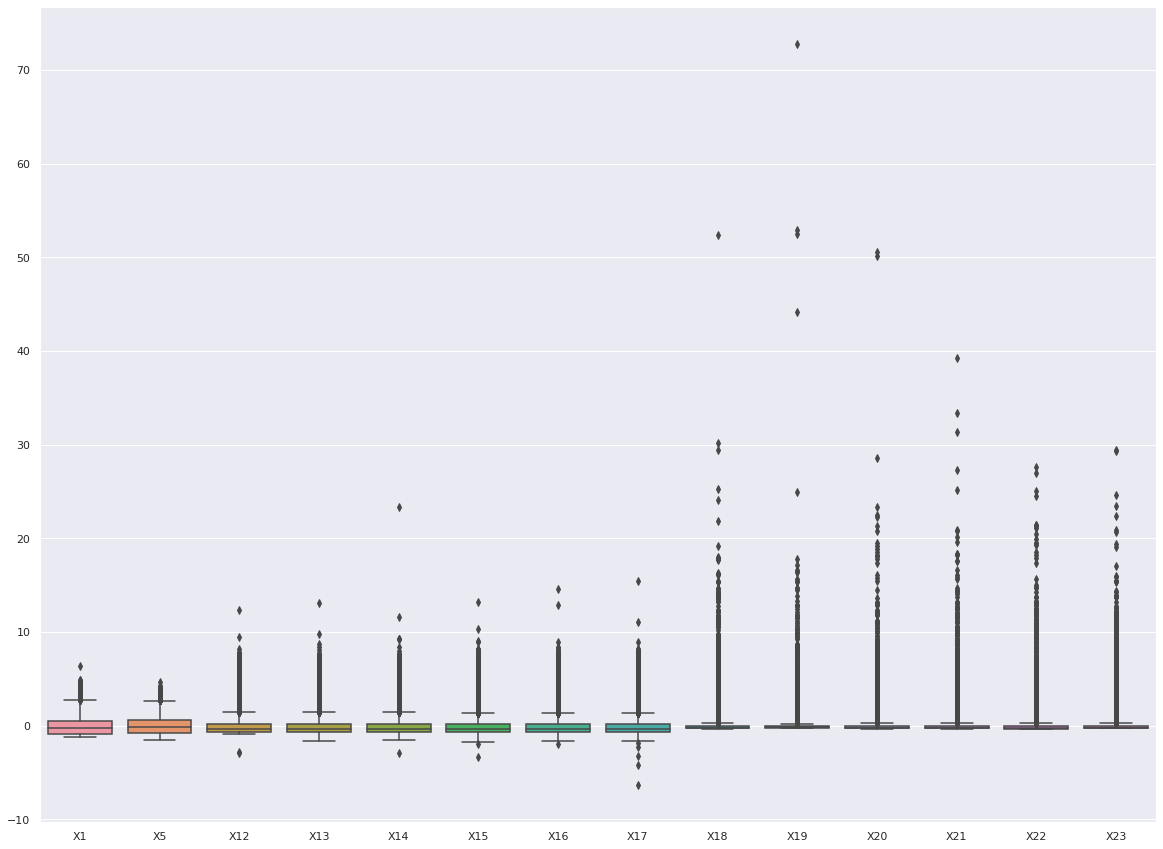

In [38]:
namesx = list()
namesx = dataf_scaled[['X1', 'X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18','X19', 'X20', 'X21', 'X22', 'X23']]
sns.set(rc={'figure.figsize':(20,15)})
sns.boxplot(data=namesx, orient = 'v')


In [39]:
dataf['X1']

0         20000
1        120000
2         90000
3         50000
4         50000
          ...  
29995    220000
29996    150000
29997     30000
29998     80000
29999     50000
Name: X1, Length: 29958, dtype: int64

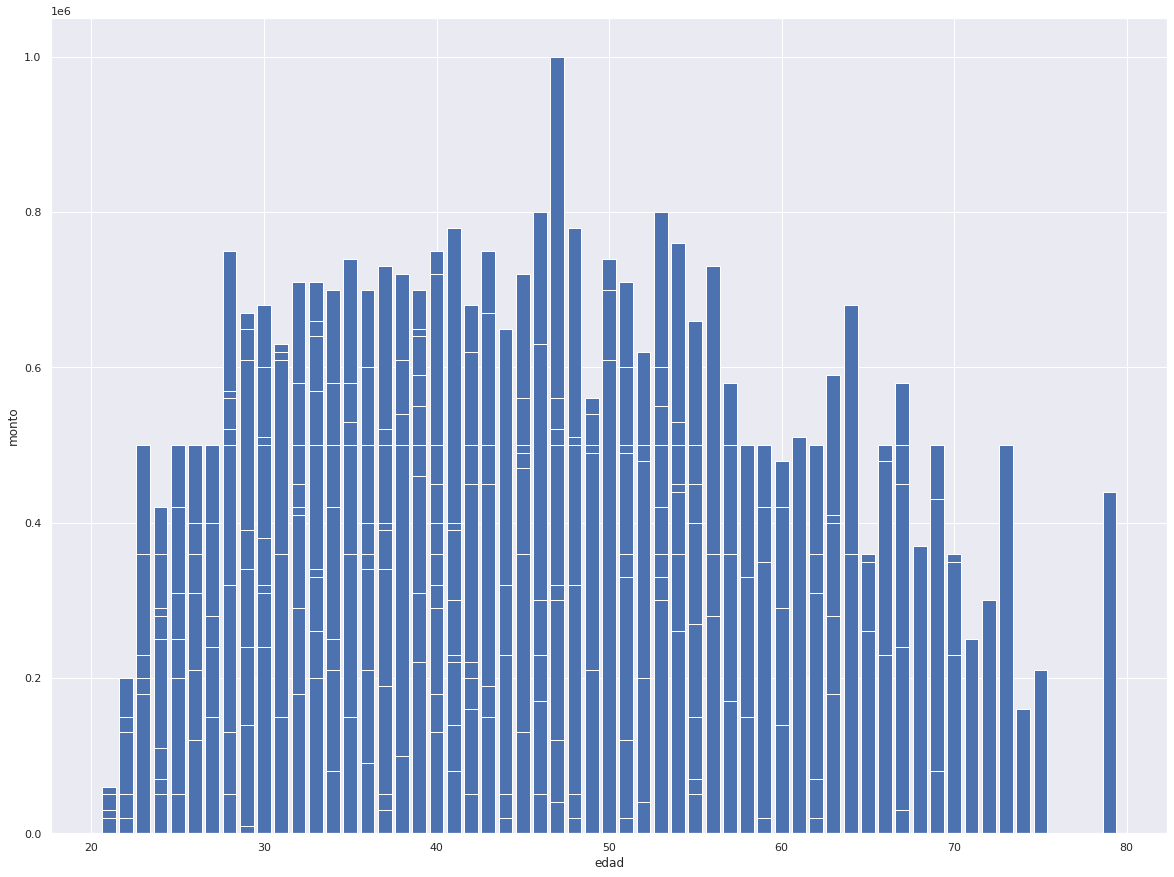

In [51]:

edad = dataf['X5']
monto = dataf['X1']
plt.bar(edad, monto)
plt.xlabel('edad')
plt.ylabel('monto')
plt.show()
plt.close('all')

**Punto 10:** Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

La primera grafica de scatter plot ayuda a tener una mejor visualizacion en la dispersion de los datos y asi poder ver la relacion entre las distintas variables, en este caso se graficó las variables X15 y X16 escaladas por ende se puede validar el tipo de correlacion que tienen, este tipo de graficos tambien aplica con otras variables

El diagrama de bigotes o cajas es muy util para verificar los outliers de las diferentes variables, asi como su dispersion, media y cuartiles. En este caso se graficaron las variables objeto de analisis (sin categoricas ni variable dependiente) ya escaladas, aqui se puede constatar que las variables asociadas a los pagos anteriores ya que los valores si pueden ser muy distintos en todos los casos

Por último grafique la relacion entre el monto prestado y la edad para revisar un poco y conocer si existe alguna tendencia en ciertos rangos de edad, esta grafica esta sobre los datos sin escalar.